<h1>Exploratory Data Analysis 📈</h1>

**Project Overview**

This project performs exploratory data analysis on the Tiny ImageNet-C dataset, a corrupted version of the Tiny ImageNet dataset, designed to evaluate model robustness to common visual corruptions. The goal is to understand the dataset’s structure, class distribution, and corruption types in preparation for training and evaluating convolutional neural networks (CNNs).

**Dataset Summary**

	•	Name: Tiny ImageNet-C
	•	Classes: 200 object categories
	•	Corruption Types: 15+ (e.g., blur, noise, compression, weather effects)
	•	Structure: Each image has a corresponding corruption type and object class label
	•	Source: Adapted from Tiny ImageNet and ImageNet-C from [Hendrycks & Dietterich, 2019]

**Note**:

The CNN will only be trained to identify corruption types, more specifically, the object in the image and the severity of the corruption on the image will not be taken into account for classification purposes.

<h2>1. Download Dataset - Tiny Imagenet-C</h2>

[Github for dataset](https://github.com/hendrycks/robustness)

In [ ]:
!wget -O tiny-imagenet-c.tar "https://zenodo.org/records/2536630/files/Tiny-ImageNet-C.tar?download=1"

<h2>1. a) Extract Files</h2>

In [ ]:
!tar -xvf tiny-imagenet-c.tar


<h2>2. Install & Import Required Packages</h2>

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from glob import glob

<h2>3. Update File Path for Dataset</h2>

In [10]:
# Sample corruption category to display images
sample_images = glob('/content/Tiny-ImageNet-C/*/*/*/*.JPEG')

# Total images in one category
print(f"Found {len(sample_images)} images in the dataset")

# List of all classifications
print(os.listdir('/content/Tiny-ImageNet-C'))

Found 750000 images in the dataset
['jpeg_compression', 'glass_blur', 'contrast', 'gaussian_noise', 'shot_noise', 'pixelate', 'frost', 'brightness', 'motion_blur', 'fog', 'defocus_blur', 'zoom_blur', 'snow', 'impulse_noise', 'elastic_transform']


<h2>4. Display Sample Images</h2>

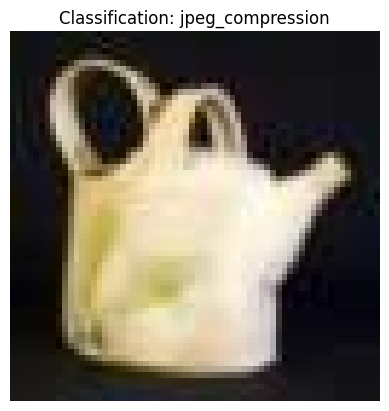

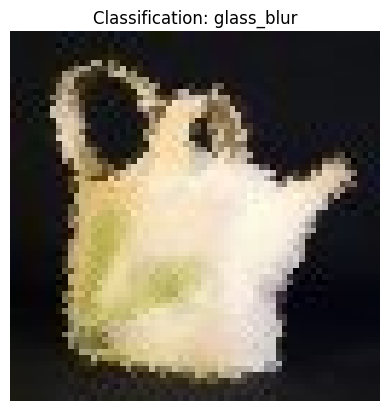

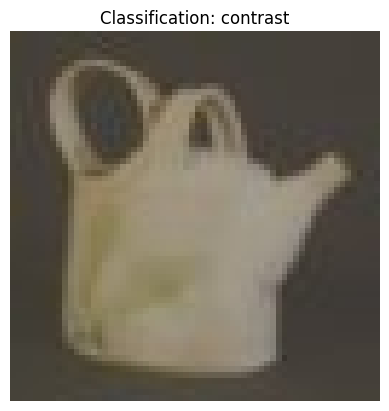

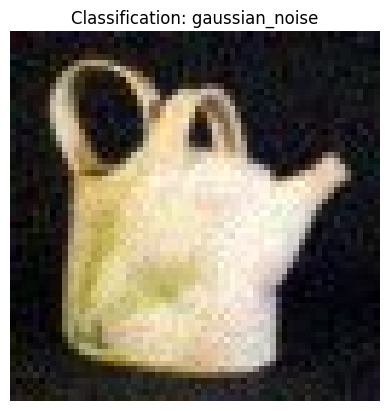

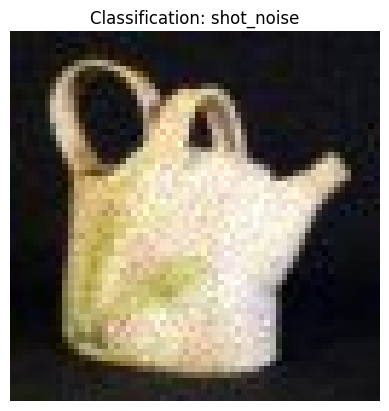

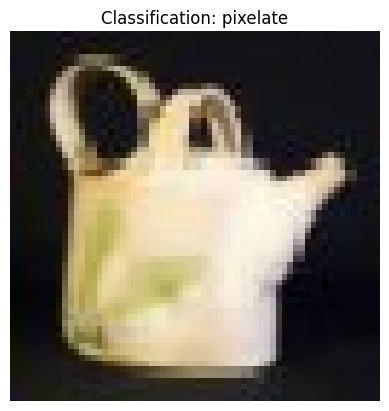

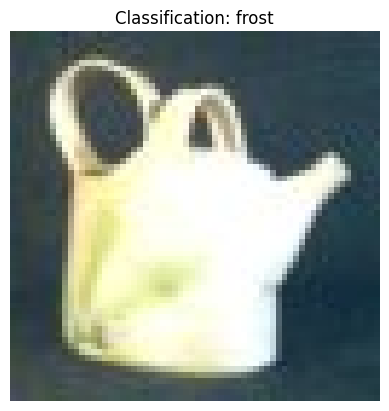

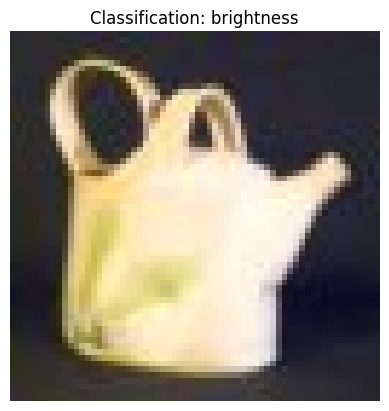

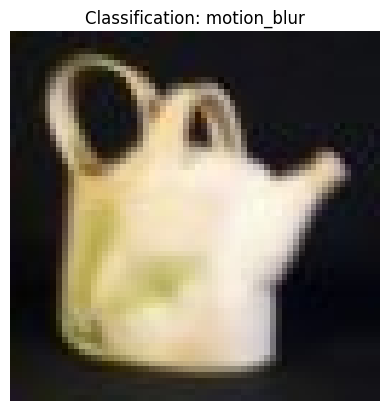

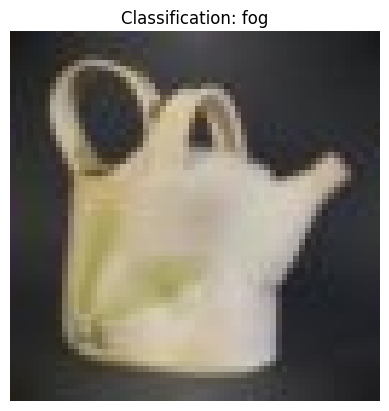

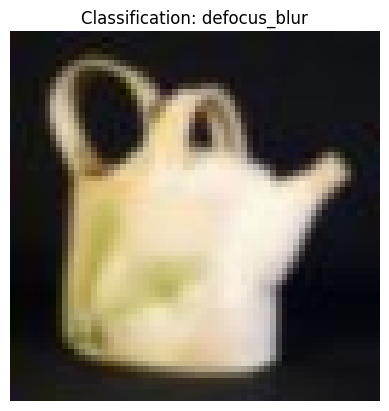

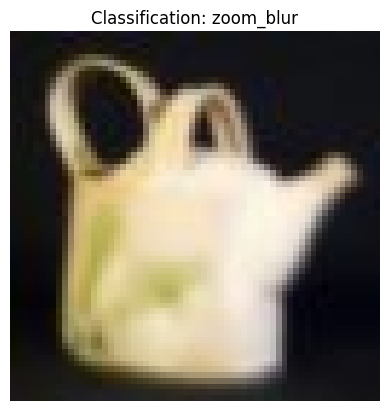

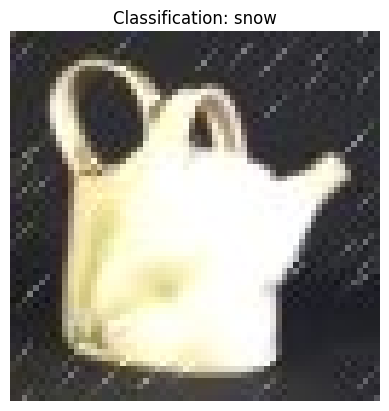

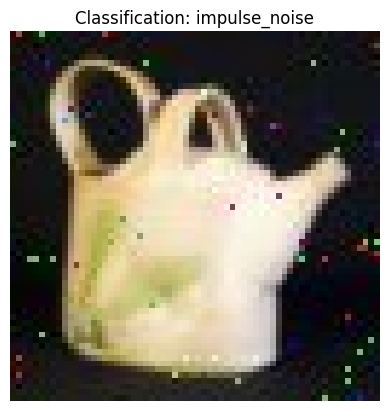

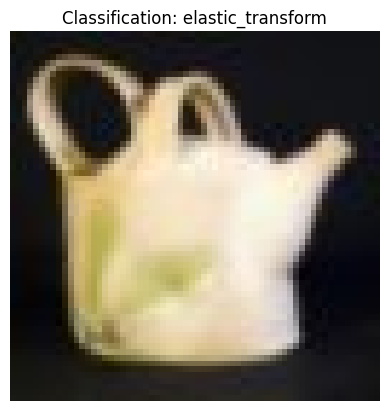

In [35]:
for classification in os.listdir('/content/Tiny-ImageNet-C'):
    # Find the first JPEG image in the classification folder
    img_path = glob(os.path.join('/content/Tiny-ImageNet-C', classification, '*', '*', '*.JPEG'))[52]

    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Classification: {classification}")  # Set title to classification
    plt.axis('off')
    plt.show()

    # Note: Sample images will appear low resolution due to being upscaled from the original 64px by 64px resolution.


<h2>5. Visualize Dataset</h2>

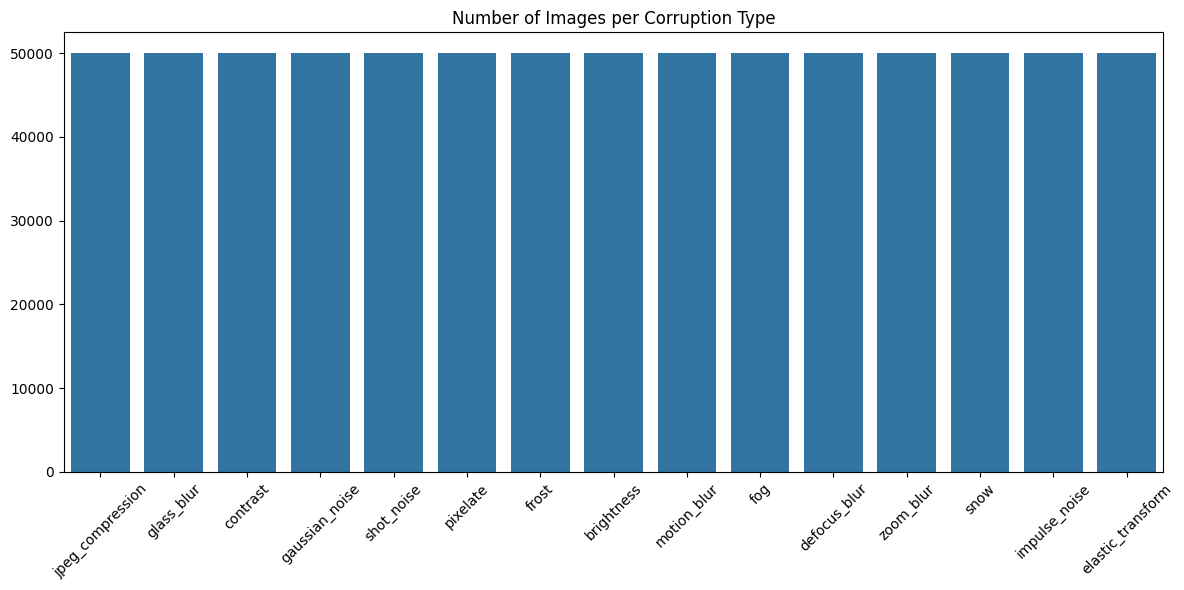

In [36]:
corruption_root = '/content/Tiny-ImageNet-C'
corruption_types = os.listdir(corruption_root)

# Count images in each corruption type
corruption_counts = {}
for corruption in corruption_types:
    paths = glob(os.path.join(corruption_root, corruption, '*', '*', '*.JPEG'))
    corruption_counts[corruption] = len(paths)

# Plot counts
plt.figure(figsize=(12, 6))
sns.barplot(x=list(corruption_counts.keys()), y=list(corruption_counts.values()))
plt.title("Number of Images per Corruption Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()